In [1]:
pip install pandas scikit-learn numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Data 1202\dataset.csv')


# Ensure the 'classification' column is used for labels
y = df['classification']
X = df.drop(columns=['classification'])

# Convert non-numeric columns to numeric using Label Encoding
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

# Extract information about the dataset
num_instances = df.shape[0]
num_features = df.shape[1] - 1  # Excluding the label column
class_distribution = y.value_counts()

print(f"Number of instances: {num_instances}")
print(f"Number of features: {num_features}")
print(f"Class distribution:\n{class_distribution}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Print the sizes and class distributions of the training and testing sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Testing set class distribution:\n{y_test.value_counts()}")



Number of instances: 100000
Number of features: 34
Class distribution:
classification
malware    50000
benign     50000
Name: count, dtype: int64
Training set size: 70000
Testing set size: 30000
Training set class distribution:
classification
benign     35000
malware    35000
Name: count, dtype: int64
Testing set class distribution:
classification
malware    15000
benign     15000
Name: count, dtype: int64



Basic statistics:
         millisecond         state  usage_counter          prio  \
count  100000.000000  1.000000e+05       100000.0  1.000000e+05   
mean      499.500000  1.577683e+05            0.0  3.069706e+09   
std       288.676434  9.361726e+05            0.0  2.963061e+05   
min         0.000000  0.000000e+00            0.0  3.069190e+09   
25%       249.750000  0.000000e+00            0.0  3.069446e+09   
50%       499.500000  0.000000e+00            0.0  3.069698e+09   
75%       749.250000  4.096000e+03            0.0  3.069957e+09   
max       999.000000  4.326605e+07            0.0  3.070222e+09   

         static_prio  normal_prio    policy  vm_pgoff  vm_truncate_count  \
count  100000.000000     100000.0  100000.0  100000.0      100000.000000   
mean    18183.900070          0.0       0.0       0.0       15312.739510   
std      4609.792765          0.0       0.0       0.0        3256.475008   
min     13988.000000          0.0       0.0       0.0        9695.000000 

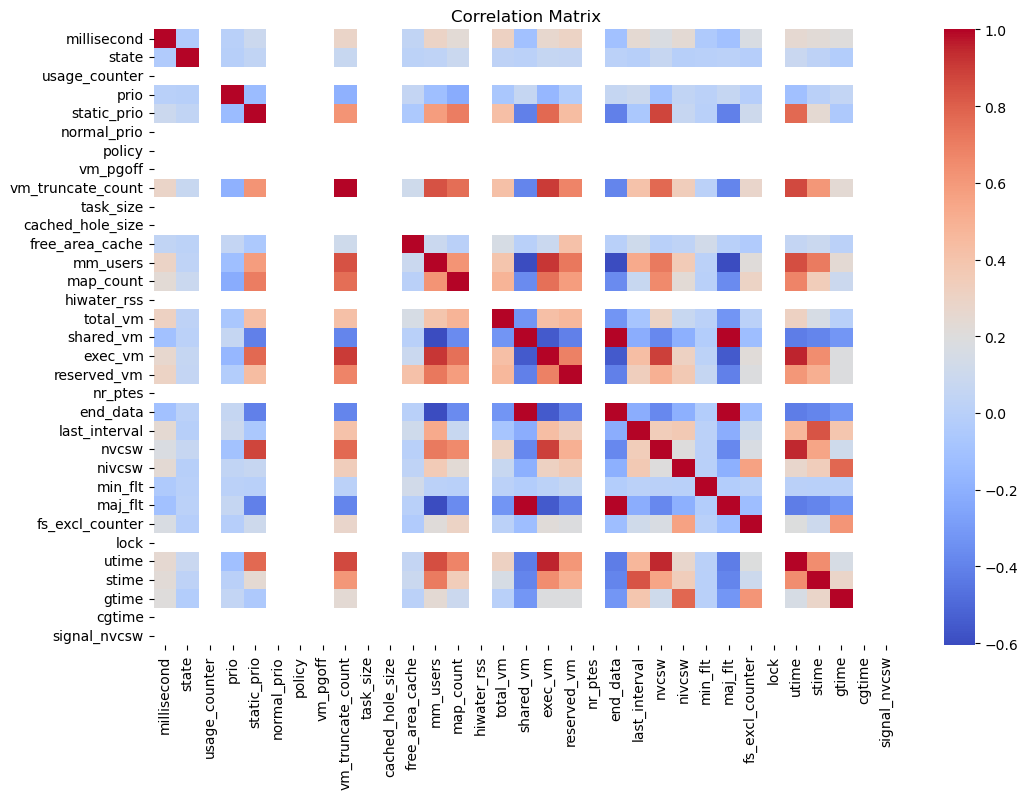

In [3]:
# Separate numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

print("\nBasic statistics:")
print(numeric_df.describe())

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


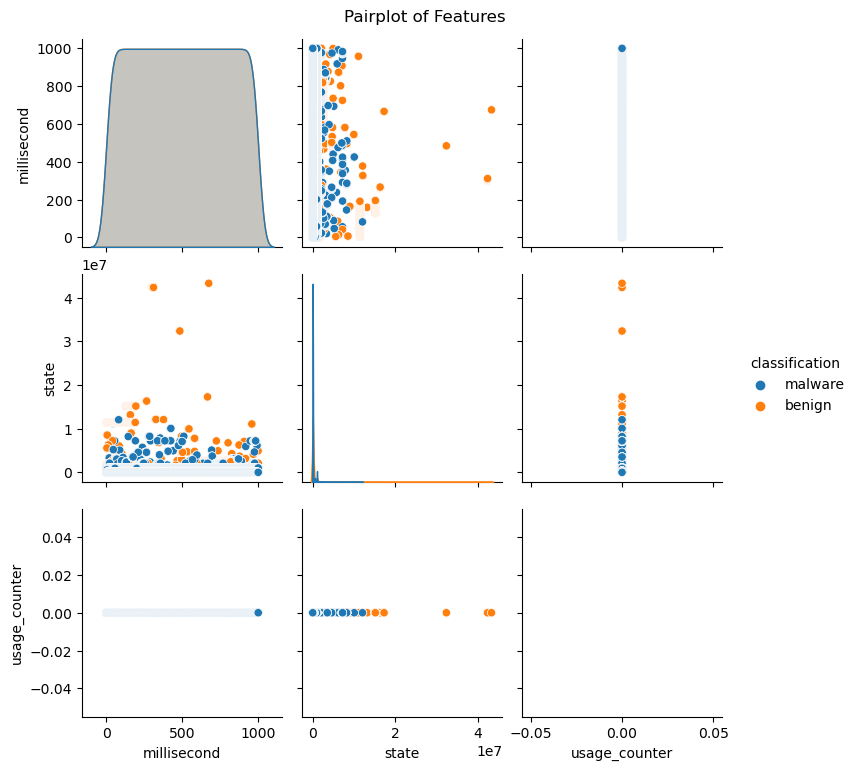

In [4]:
# Pairplot for visualizing relationships between features
# Selecting a subset of features to avoid overloading the plot
sampled_features = df.columns[:5]  # Adjust based on dataset size
sns.pairplot(df[sampled_features], hue='classification', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()



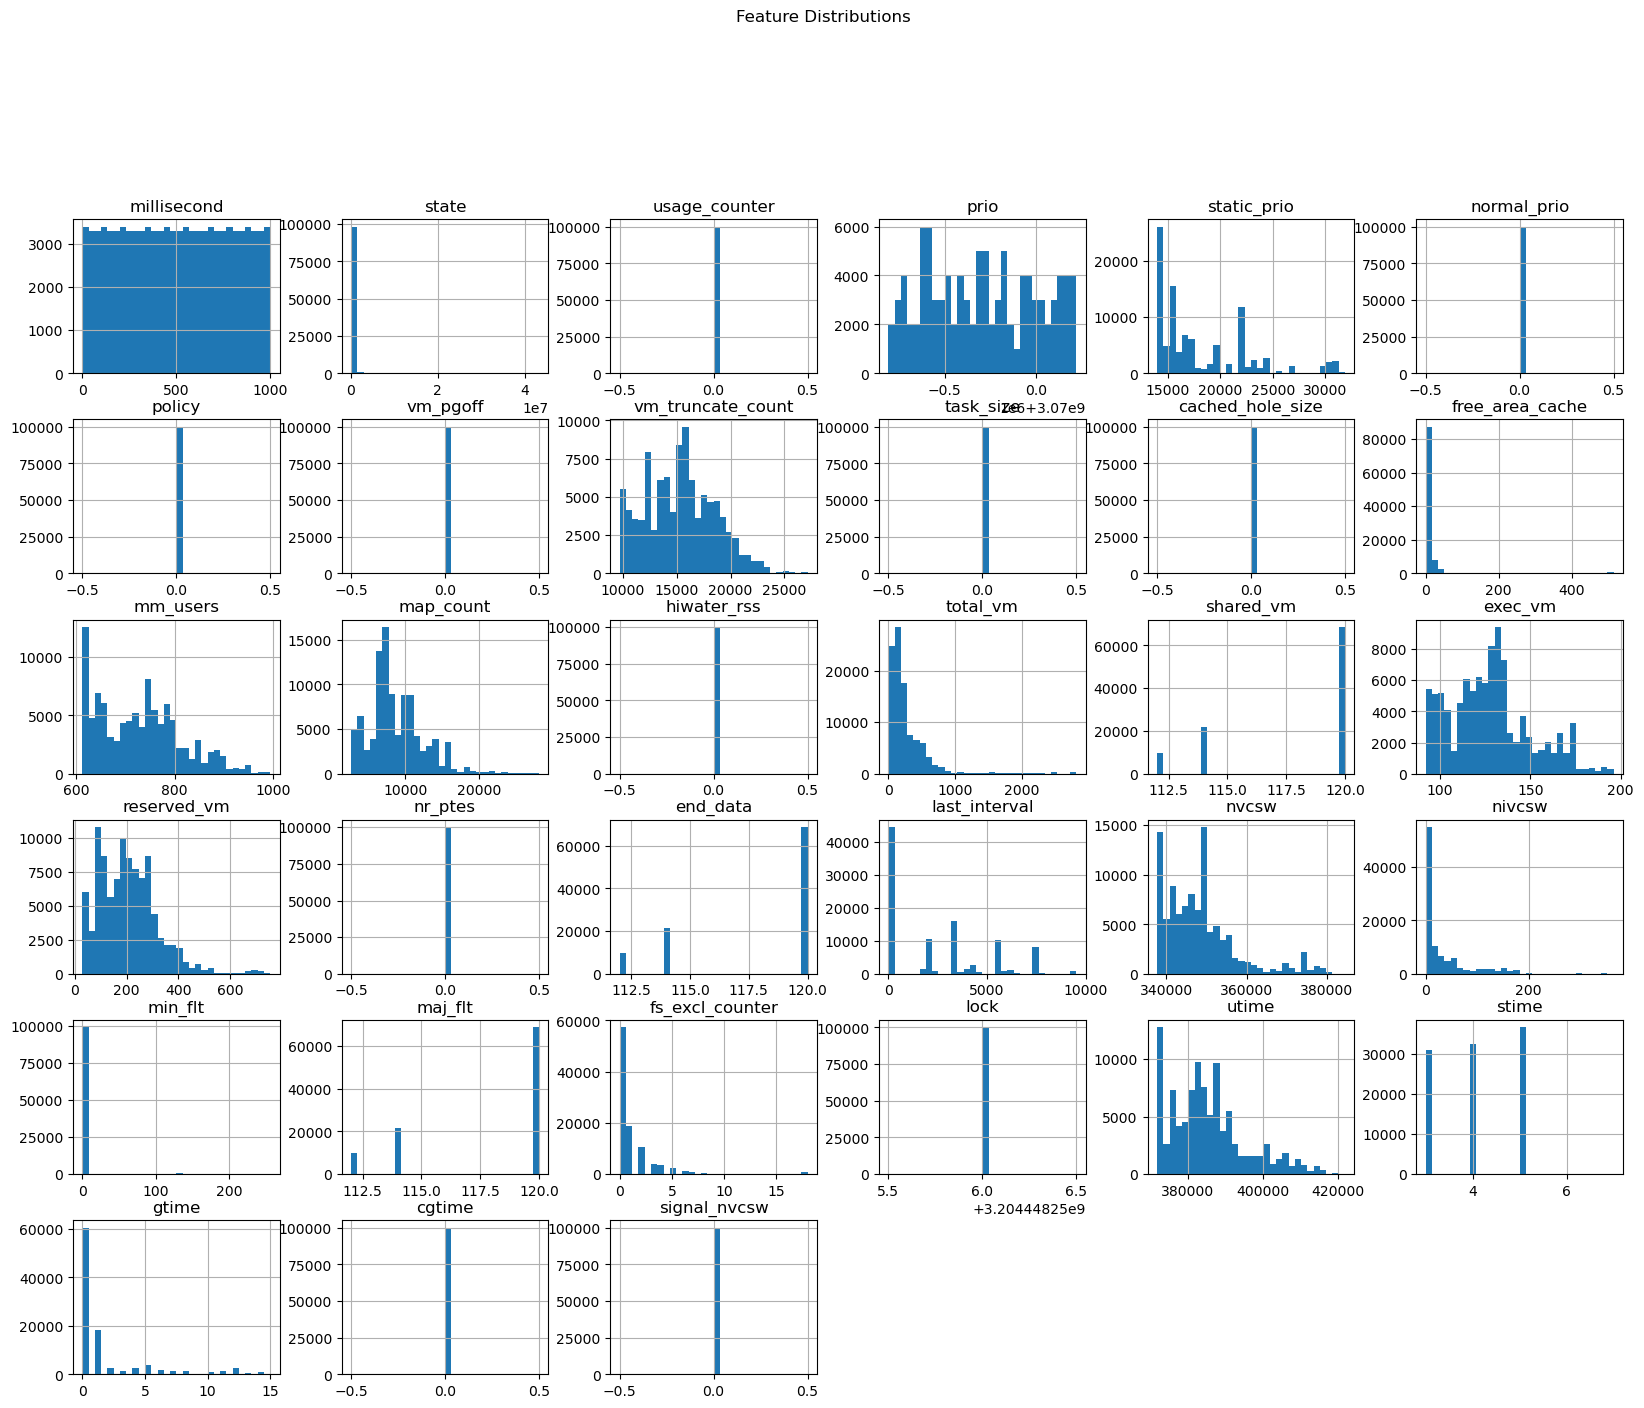

In [5]:
# Distribution of each feature
numeric_df.hist(figsize=(20, 15), bins=30)
plt.suptitle('Feature Distributions', y=1.02)
plt.show()



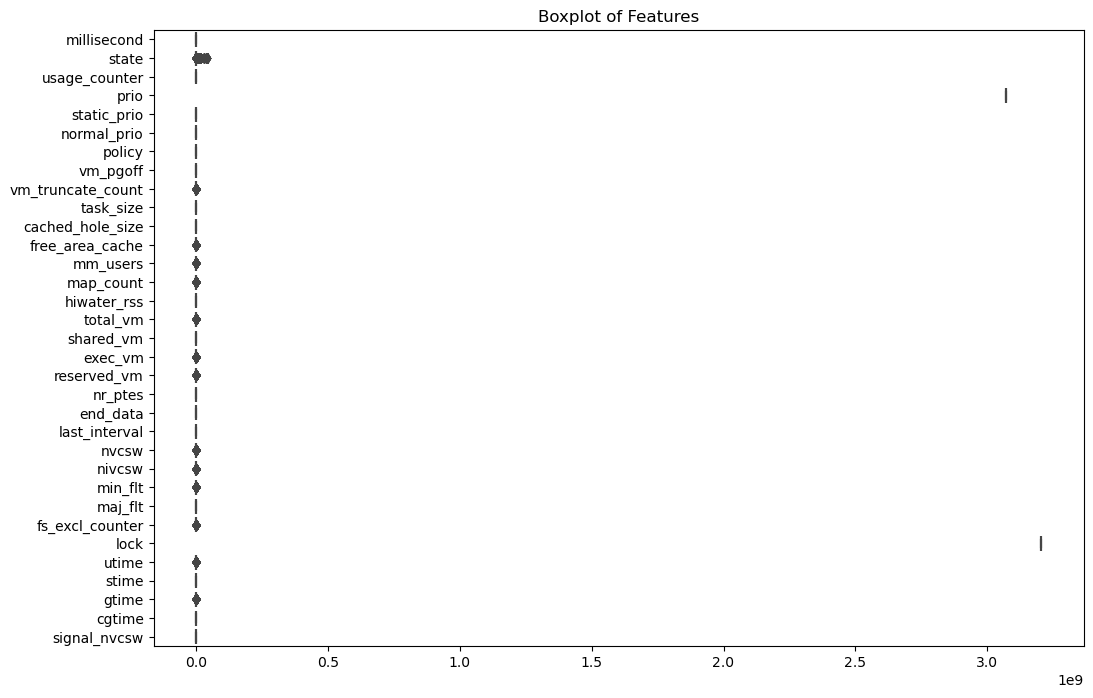

In [6]:
# Boxplots for identifying outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, orient='h')
plt.title('Boxplot of Features')
plt.show()



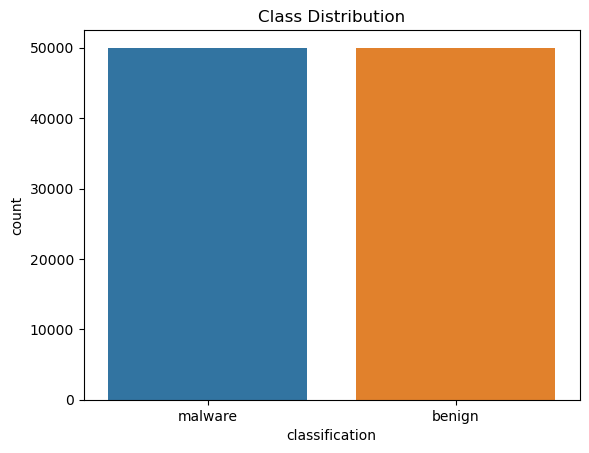

In [7]:
# Countplot to visualize class distribution
sns.countplot(x='classification', data=df)
plt.title('Class Distribution')
plt.show()

In [2]:
# Initialize classifiers
clf_rf = RandomForestClassifier(random_state=42)
clf_svm = SVC(random_state=42)
clf_lr = LogisticRegression(random_state=42, max_iter=10000)

# Train the classifiers
clf_rf.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)

print("Training complete for all classifiers.")

# Random Forest Classifier
y_pred_rf = clf_rf.predict(X_test)
print("\nRandom Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Support Vector Machine Classifier
y_pred_svm = clf_svm.predict(X_test)
print("\nSupport Vector Machine Classifier:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Logistic Regression Classifier
y_pred_lr = clf_lr.predict(X_test)
print("\nLogistic Regression Classifier:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training complete for all classifiers.

Random Forest Classifier:
[[15000     0]
 [    0 15000]]
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     15000
     malware       1.00      1.00      1.00     15000

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000


Support Vector Machine Classifier:
[[    3 14997]
 [    0 15000]]
              precision    recall  f1-score   support

      benign       1.00      0.00      0.00     15000
     malware       0.50      1.00      0.67     15000

    accuracy                           0.50     30000
   macro avg       0.75      0.50      0.33     30000
weighted avg       0.75      0.50      0.33     30000


Logistic Regression Classifier:
[[    0 15000]
 [    0 15000]]


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.00      0.00      0.00     15000
     malware       0.50      1.00      0.67     15000

    accuracy                           0.50     30000
   macro avg       0.25      0.50      0.33     30000
weighted avg       0.25      0.50      0.33     30000



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
